In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

# DEBUG
pd.set_option("display.max_rows", None)

nltk.download("vader_lexicon")

sia = SentimentIntensityAnalyzer()

# load csv file
df = pd.read_csv("Sentiment Analysis on DLSU-D Tuition Fee Increase.csv")

# ignore the first two columns ("Timestamp" and "Name")
question_columns = list(df.columns.values[2:12])

# replace the column names with a shorter one for convenience
question_num = 1
for column in df:
    if column == "Timestamp" or column == "Name":
        pass
    else:
        df.rename(columns={column:f"Q{question_num}"}, inplace=True)
        if question_num > 9:
            break
        else:
            question_num += 1

def get_question_info(df, question_num=1):
    """Compute the polarity and compound scores of the answers."""
    # drop na values
    vals_to_drop = ["", "None", "none", "NaN", "N/a", "-"]
    for item in vals_to_drop:
        df.loc[df[f"Q{question_num}"] == item] = pd.NA
    df.dropna(inplace=True)

    question_df = df[[f"Q{question_num}", f"Q{question_num}_label"]].copy()
    question_df["polarity_scores"] = question_df.iloc[:,0].apply(lambda answer: sia.polarity_scores(answer))
    question_df["neg"] = question_df["polarity_scores"].apply(lambda score_dict: score_dict["neg"])
    question_df["neu"] = question_df["polarity_scores"].apply(lambda score_dict: score_dict["neu"])
    question_df["pos"] = question_df["polarity_scores"].apply(lambda score_dict: score_dict["pos"])
    question_df["compound"] = question_df["polarity_scores"].apply(lambda score_dict: score_dict["compound"])
    question_df["compound_score"] = question_df["compound"].apply(lambda score: "pos" if score > 0 else ("neu" if score == 0 else "neg"))

    return question_df

def process_dataframe_metrics(df, question_num=1):
    print("Accuracy Score:", accuracy_score(df[f"Q{question_num}_label"], df["compound_score"]))
    print("Classification Report:\n", classification_report(df[f"Q{question_num}_label"], df["compound_score"], zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(df[f"Q{question_num}_label"], df["compound_score"]))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hello\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Accuracy Score: 0.8036363636363636
Classification Report:
               precision    recall  f1-score   support

         neg       0.83      0.70      0.76       258
         neu       0.71      0.92      0.80       167
         pos       0.84      0.82      0.83       400

    accuracy                           0.80       825
   macro avg       0.79      0.81      0.80       825
weighted avg       0.81      0.80      0.80       825

Confusion Matrix:
 [[180  25  53]
 [  3 154  10]
 [ 33  38 329]]


,answers,label,polarity_scores,neg,neu,pos,compound,compound_score
0,"Yes, because it helps me peak my interests in ...",pos,"{'neg': 0.0, 'neu': 0.622, 'pos': 0.378, 'comp...",0.000,0.622,0.378,0.7430,pos
1,Yes because I am interested at my course.,pos,"{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp...",0.000,0.481,0.519,0.6597,pos
2,Yes! Because I love what I do.,pos,"{'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'comp...",0.000,0.294,0.706,0.8016,pos
3,"I feel that it is lacking, with the increase o...",neg,"{'neg': 0.129, 'neu': 0.827, 'pos': 0.044, 'co...",0.129,0.827,0.044,-0.5267,neg
4,"Yes, because it is my passion and I am curious...",pos,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.000,0.556,0.444,0.7906,pos
5,Im satisfied with my course. My knowledge lear...,pos,"{'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'comp...",0.000,0.749,0.251,0.6908,pos
6,"Yes, I am satisfied. It is very fun learning n...",pos,"{'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'comp...",0.000,0.569,0.431,0.8439,pos
7,No. Because I do not have any access to labora...,neg,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",0.167,0.833,0.000,-0.2960,neg
8,Yes. I believe that we have competent and know...,pos,"{'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'comp...",0.000,0.583,0.417,0.6124,pos
9,Yes. The course I took is in line with my inte...,pos,"{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp...",0.000,0.615,0.385,0.7579,pos


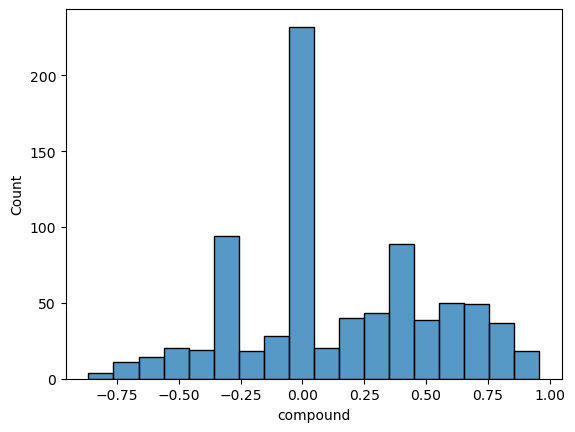

In [2]:
df = pd.read_csv("Sentiment Analysis on DLSU-D Tuition Fee Increase.csv")

question_num = 1
for column in df:
    if column == "Timestamp" or column == "Name":
        pass
    else:
        df.rename(columns={column:f"Q{question_num}"}, inplace=True)
        if question_num > 9:
            break
        else:
            question_num += 1

data = pd.DataFrame(
    {
        "answers": pd.concat(
            [df["Q1"], df["Q2"], df["Q3"], df["Q4"], df["Q5"],
            df["Q6"], df["Q7"], df["Q8"], df["Q9"], df["Q10"]],
            ignore_index=True
        ),
        "label": pd.concat(
            [df["Q1_label"], df["Q2_label"], df["Q3_label"], df["Q4_label"], df["Q5_label"],
            df["Q6_label"], df["Q7_label"], df["Q8_label"], df["Q9_label"], df["Q10_label"]],
            ignore_index=True
        )
    }
)

vals_to_drop = ["", "None", "none", "NaN", "N/a", "-"]
for item in vals_to_drop:
    data.loc[data["answers"] == item] = pd.NA
data.dropna(inplace=True)

data["polarity_scores"] = data["answers"].apply(lambda answer: sia.polarity_scores(answer))
data["neg"] = data["polarity_scores"].apply(lambda score_dict: score_dict["neg"])
data["neu"] = data["polarity_scores"].apply(lambda score_dict: score_dict["neu"])
data["pos"] = data["polarity_scores"].apply(lambda score_dict: score_dict["pos"])
data["compound"] = data["polarity_scores"].apply(lambda score_dict: score_dict["compound"])
data["compound_score"] = data["compound"].apply(lambda score: "pos" if score > 0 else ("neu" if score == 0 else "neg"))

print("Accuracy Score:", accuracy_score(data["label"], data["compound_score"]))
print("Classification Report:\n", classification_report(data["label"], data["compound_score"], zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(data["label"], data["compound_score"]))

# data.describe()
# sns.pairplot(data)
sns.histplot(data["compound"])
data

C:\Users\Hello\AppData\Local\Temp\ipykernel_14568\3672989692.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["compound"])


<Axes: xlabel='compound', ylabel='Density'>

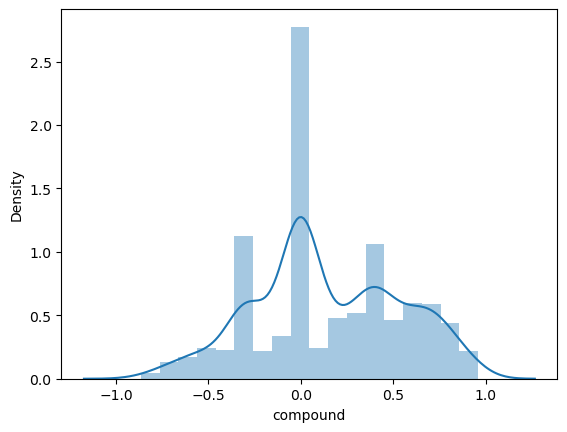

In [3]:
# sns.histplot(data[["neu", "neg", "pos"]])
sns.distplot(data["compound"])

<Axes: >

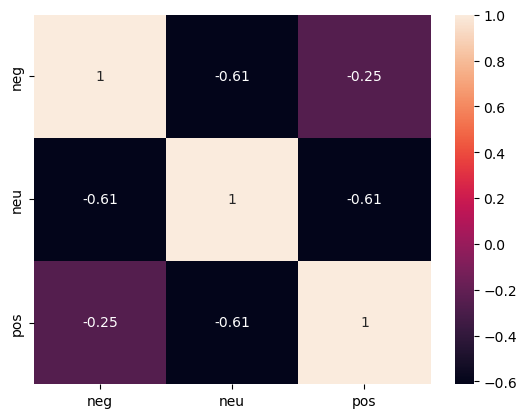

In [4]:
sns.heatmap(data[["neg", "neu", "pos"]].corr(), annot=True)

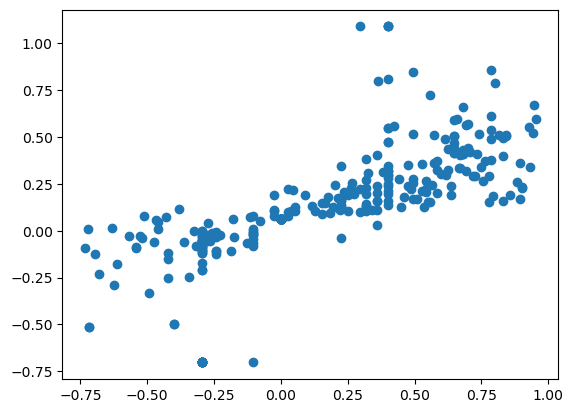

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

x = data[["neg", "neu", "pos"]]
y = data["compound"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

lr.fit(x_train, y_train)

predictions = lr.predict(x_test)
plt.scatter(y_test, predictions)

In [6]:
print(data["label"].value_counts())
print(data["compound_score"].value_counts())

pos    400
neg    258
neu    167
Name: label, dtype: int64
pos    392
neu    217
neg    216
Name: compound_score, dtype: int64


In [7]:
# remember that the polarity scores dict has 4 separate values? not all of them have values, that's why any of them are 0s.
sns.pairplot(data[["neg", "pos", "compound"]])

In [8]:
test_df1 = data[["neg", "neu", "pos", "compound"]]
test_df1

,neg,neu,pos,compound
0,0.000,0.622,0.378,0.7430
1,0.000,0.481,0.519,0.6597
2,0.000,0.294,0.706,0.8016
3,0.129,0.827,0.044,-0.5267
4,0.000,0.556,0.444,0.7906
5,0.000,0.749,0.251,0.6908
6,0.000,0.569,0.431,0.8439
7,0.167,0.833,0.000,-0.2960
8,0.000,0.583,0.417,0.6124
9,0.000,0.615,0.385,0.7579


C:\Users\Hello\AppData\Local\Temp\ipykernel_14568\566383695.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df1["neg"] = zero_to_nan(test_df1["neg"])
C:\Users\Hello\AppData\Local\Temp\ipykernel_14568\566383695.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df1["neu"] = zero_to_nan(test_df1["neu"])
C:\Users\Hello\AppData\Local\Temp\ipykernel_14568\566383695.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

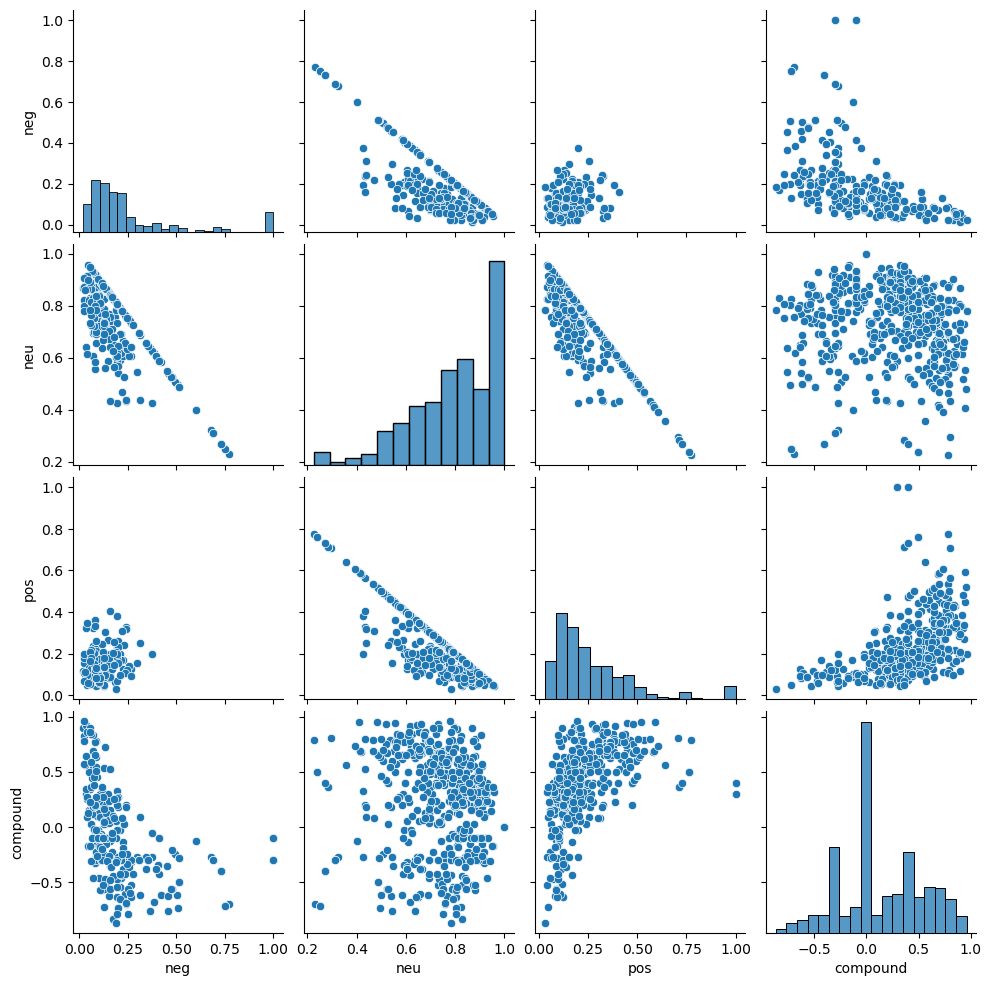

In [25]:
# vals_to_drop = [0.000]
# for item in vals_to_drop:
    # test_df1.loc[test_df1["neg"] == item] = 0.001
    # test_df1.loc[test_df1["neu"] == item] = 0.001
    # test_df1.loc[test_df1["pos"] == item] = 0.001
# test_df1.dropna(inplace=True)

# for value in test_df1["neg"]:
#     if value == 0:
#         value = pd.NA

def n(values):
    return [float('nan') if x==0 else x for x in values]

test_df1["neg"] = n(test_df1["neg"])
test_df1["neu"] = n(test_df1["neu"])
test_df1["pos"] = n(test_df1["pos"])

test_df1
sns.pairplot(test_df1[["neg", "neu", "pos", "compound"]])

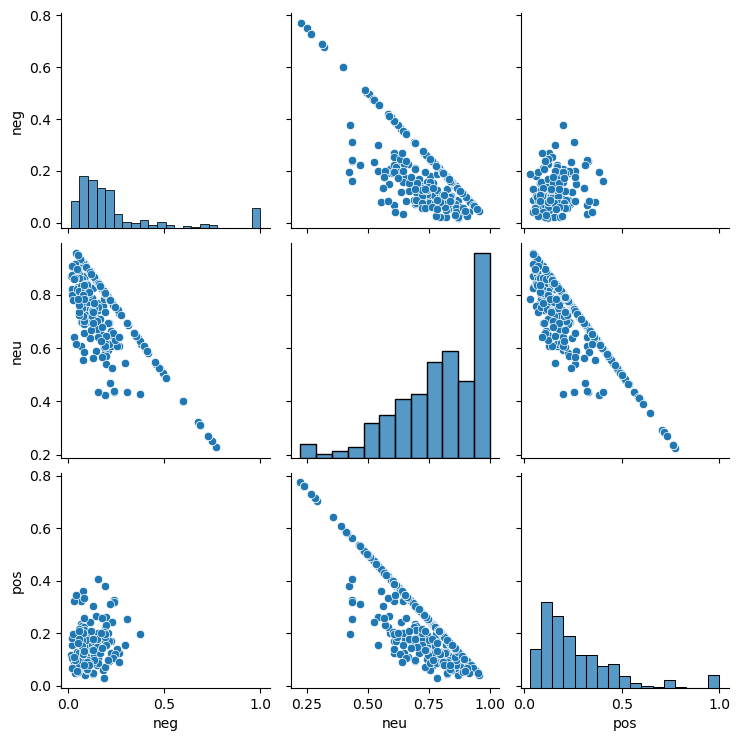

In [18]:
sns.pairplot(test_df1[["neg", "neu", "pos"]])

<Axes: ylabel='Count'>

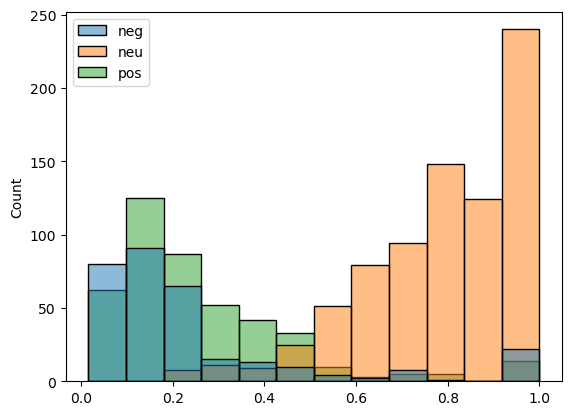

In [28]:
sns.histplot(test_df1[["neg", "neu", "pos"]])
# sns.histplot(test_df1["compound"])

C:\Users\Hello\AppData\Local\Temp\ipykernel_14568\388853219.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_df1["compound"])


<Axes: xlabel='compound', ylabel='Density'>

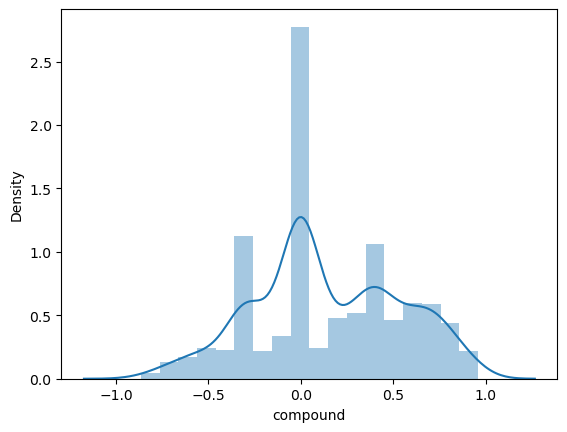

In [29]:
sns.distplot(test_df1["compound"])

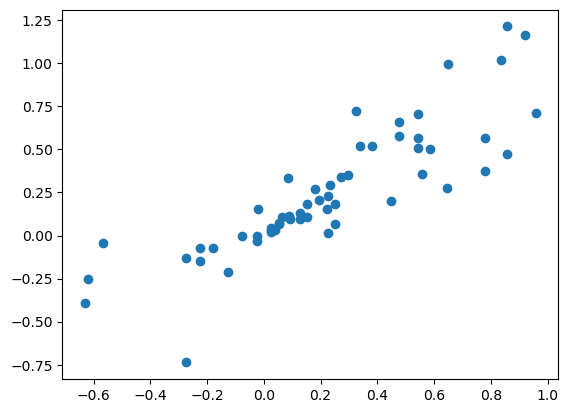

In [32]:
# with NaN
lr = LinearRegression()

x = test_df1[["neg", "neu", "pos"]]
y = test_df1["compound"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

lr.fit(x_train, y_train)

predictions = lr.predict(x_test)
plt.scatter(y_test, predictions)

show graphs about:  
the compound score plotted using histplot  
huge pairplot including the neg neu pos and compound  
some matplotlib shit involving the number of values of the columns "label" and "compound_score", like 3 bars